## 1. Import Library

Berikut adalah beberapa library yang akan kita gunakan dalam demo ini:

*   `torch` & `torch.nn.functional`: Untuk operasi tensor dan fungsi softmax.
*   `math`: Untuk operasi akar kuadrat pada scaling factor.
*   `matplotlib` & `seaborn`: Untuk membuat visualisasi heatmap yang estetik.

In [ ]:
import torch
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set seed agar hasil random konsisten setiap kali dijalankan
torch.manual_seed(42)

## 2. Fungsi `scaled_dot_product_attention`

Pada bagian ini, kita mendefinisikan logika inti mekanisme attention sesuai rumus paper **"Attention Is All You Need"**.

Self-attention adalah jantung dari algoritma Transformer. Fungsi ini menerima tiga input: **Query**, **Key**, dan **Value**.

Prosesnya terjadi dalam 4 langkah:

1. **MatMul ($QK^T$)**: Mengalikan Query dengan Key (transpose) untuk mencari kemiripan.
2. **Scale**: Membagi dengan akar dimensi ($\sqrt{d_k}$) agar gradien stabil.
3. **Softmax**: Mengubah skor menjadi probabilitas (0 hingga 1).
4. **MatMul ($V$)**: Mengalikan bobot atensi dengan Value untuk mendapatkan konteks akhir.

In [ ]:

def scaled_dot_product_attention(query, key, value):
    """
    Menghitung attention score dan context vector.
    Rumus: Softmax(QK^T / sqrt(d_k)) * V
    """
    d_k = query.size(-1)  # Dimensi key (untuk scaling)


    # Langkah 1: MatMul (Q * K^T) & Langkah 2: Scaling
    # Kita menukar dimensi Key (transpose) agar bisa dikalikan
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)

    print(f"1. Shape Scores (Q.K^T): {scores.shape}")

    # Langkah 3: Softmax (Mengubah skor menjadi probabilitas 0-1)
    attention_weights = F.softmax(scores, dim=-1)

    print("2. Attention Weights calculated (Sum = 1)")

    # Langkah 4: MatMul dengan Value (Bobot * V)
    output = torch.matmul(attention_weights, value)

    print(f"3. Shape Output Akhir: {output.shape}")

    return output, attention_weights

In [ ]:
B, H, W, 10 ==> embeding (dimensi), C = 32, 64,

- dimensi kecil (spatial dimension) == 128 x 128
- jangan dense prediction ==> sparse => klasifikasi, regressi
500
- pretrained-model

fast attentio

## 3. Simulasi

Pada bagian ini kita mensimulasikan sebuah kalimat: "The Bank of the river" (5 kata).

Kita anggap setiap kata sudah diubah menjadi vektor angka (embedding) dengan panjang dimensi 8. Kita menggunakan `torch.rand` untuk men-generate nilai acak untuk matriks **Q**, **K**, dan **V**.

In [ ]:
def run_demo():
    # Setup Data Dummy
    # Kalimat: "The Bank of the river" (5 kata)
    # Anggap setiap kata diwakili oleh vektor embedding berdimensi 8
    seq_length = 5
    d_model = 8

    print("-" * 40)
    print("Demonstrasi Self-Attention")
    print("-" * 40)

    # Inisialisasi Random untuk Q, K, V
    # Pada implementasi aslinya, nilai matriks ini berasal dari Linear Layer (nn.Linear)
    Q = torch.rand(1, seq_length, d_model)
    K = torch.rand(1, seq_length, d_model)
    V = torch.rand(1, seq_length, d_model)

    print(f"Input Shape (Batch, Seq, Dim): {Q.shape}\n")

    # Menjalankan Fungsi Attention
    context_vector, weights = scaled_dot_product_attention(Q, K, V)

    # Kita visualisasikan bobot atensi antar kata
    words = ["The", "Bank", "of", "the", "river"]

    plt.figure(figsize=(8, 6))
    # Ambil data dari tensor ke numpy
    attn_data = weights[0].detach().numpy()

    sns.heatmap(attn_data, annot=True, cmap="viridis",
                xticklabels=words, yticklabels=words)

    plt.title("Visualisasi Self-Attention Weights\n(Seberapa kuat hubungan antar kata)")
    plt.xlabel("Key (Information Source)")
    plt.ylabel("Query (Current Word)")
    plt.show()



## 4. Run Demo

----------------------------------------
Demonstrasi Self-Attention
----------------------------------------
Input Shape (Batch, Seq, Dim): torch.Size([1, 5, 8])

1. Shape Scores (Q.K^T): torch.Size([1, 5, 5])
2. Attention Weights calculated (Sum = 1)
3. Shape Output Akhir: torch.Size([1, 5, 8])


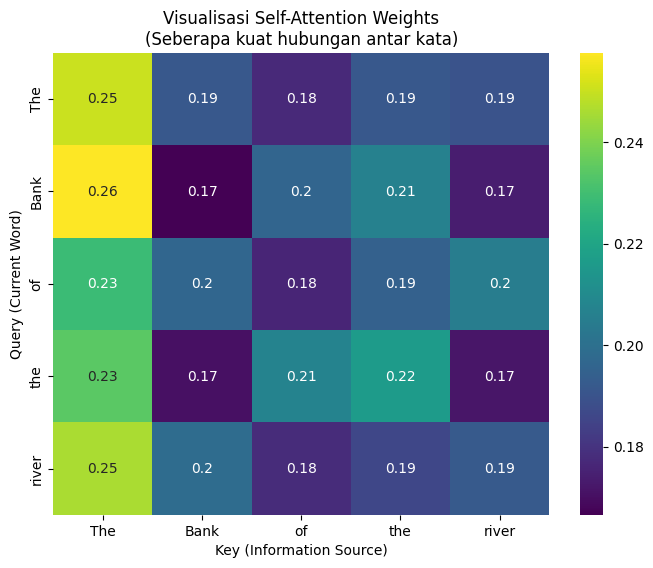

In [ ]:
if __name__ == "__main__":
    run_demo()